In [2]:
import torch

# 1. Choose it if you want to use the network architecture only.

# 1.1 load a ChangeStar (1x96) model based on ResNet-18 (R18) from scratch
model = torch.hub.load('Z-Zheng/Changen', 'changestar_1x96', backbone_name='r18', force_reload=True)

# 1.2 load a ChangeStar (1x96) model based on MiT-B1 (a Transformer backbone) from scratch
model = torch.hub.load('Z-Zheng/Changen', 'changestar_1x96', backbone_name='mitb1', force_reload=True)

# 2. Choose it if you want to explore a well-trained model.

# 2.1 load a ChangeStar (1x96) model based on ResNet-18 (R18)
# pretrained on Changen-90k, fine-tuned on LEVIR-CD train set.
model = torch.hub.load('Z-Zheng/Changen', 'changestar_1x96', backbone_name='r18',
               pretrained=True, dataset_name='levircd', force_reload=True)

# 2.2 load a ChangeStar (1x96) model based on ResNet-18 (R18)
# pretrained on Changen-90k, fine-tuned on S2Looking train set.
model = torch.hub.load('Z-Zheng/Changen', 'changestar_1x96', backbone_name='r18',
               pretrained=True, dataset_name='s2looking', force_reload=True)

# 2.3 load a ChangeStar (1x96) model based on MiT-B1
# pretrained on Changen-90k, fine-tuned on LEVIR-CD train set.
model = torch.hub.load('Z-Zheng/Changen', 'changestar_1x96', backbone_name='mitb1',
               pretrained=True, dataset_name='levircd', force_reload=True)

# 2.4 load a ChangeStar (1x96) model based on MiT-B1
# pretrained on Changen-90k, fine-tuned on S2Looking train set.
model = torch.hub.load('Z-Zheng/Changen', 'changestar_1x96', backbone_name='mitb1',
               pretrained=True, dataset_name='s2looking', force_reload=True)

c:\Users\2004a\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/Z-Zheng/Changen/zipball/main" to C:\Users\2004a/.cache\torch\hub\main.zip
2024-09-04 19:50:32, INFO:ever.core.logger:ResNetEncoder: pretrained = False
Downloading: "https://github.com/Z-Zheng/Changen/zipball/main" to C:\Users\2004a/.cache\torch\hub\main.zip
Downloading: "https://github.c

In [4]:
import torch

t1_image = torch.rand(1, 3, 512, 512)  # [b, c, h, w]
t2_image = torch.rand(1, 3, 512, 512)  # [b, c, h, w]
bi_images = torch.cat([t1_image, t2_image], dim=1)  # [b, tc, h, w]

model = torch.hub.load('Z-Zheng/Changen', 'changestar_1x96', backbone_name='mitb1',
               pretrained=True, dataset_name='s2looking', force_reload=True)
predictions = model(bi_images)
change_prob = predictions['change_prediction']  # [b, 1, h, w]

Downloading: "https://github.com/Z-Zheng/Changen/zipball/main" to C:\Users\2004a/.cache\torch\hub\main.zip


Downloading: "https://github.com/Z-Zheng/Changen/zipball/main" to C:\Users\2004a/.cache\torch\hub\main.zip


Output shape: torch.Size([1, 1, 512, 512])


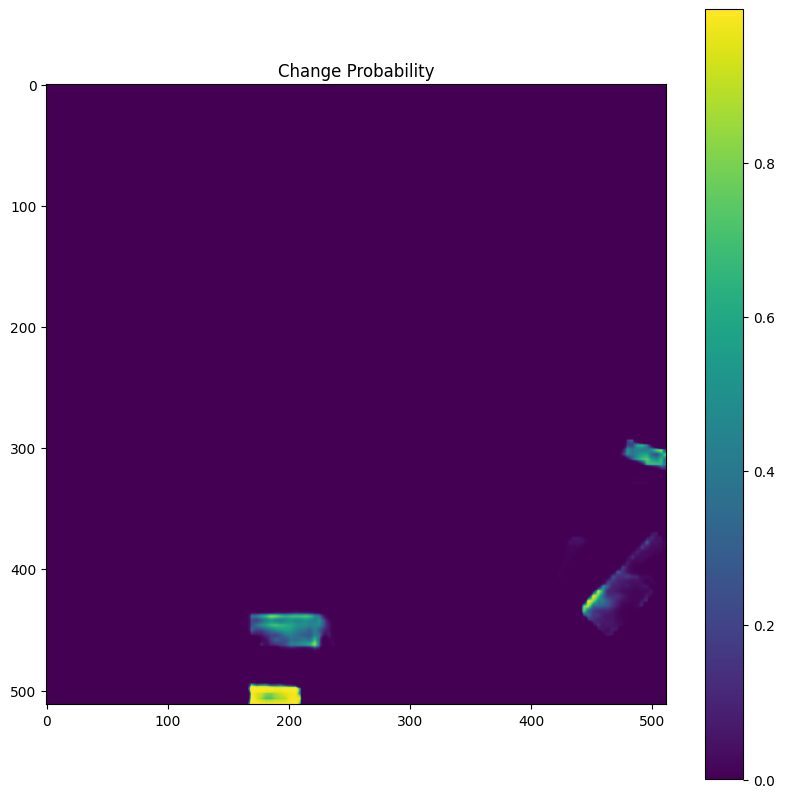

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms

# Load your own images
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Ensure image is in RGB format
    return image

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize to the input size expected by the model
    transforms.ToTensor(),           # Convert to tensor
])

# Replace these paths with the paths to your own images
before_image_path = 'C:\codes\Projects\HWAK\image2.png'
after_image_path = 'C:\codes\Projects\HWAK\image1.png'

# Load and preprocess images
t1_image = transform(load_image(before_image_path)).unsqueeze(0)  # Add batch dimension
t2_image = transform(load_image(after_image_path)).unsqueeze(0)   # Add batch dimension
bi_images = torch.cat([t1_image, t2_image], dim=1)  # [b, tc, h, w]

# Load the model
model = torch.hub.load('Z-Zheng/Changen', 'changestar_1x96', backbone_name='mitb1',
               pretrained=True, dataset_name='s2looking', force_reload=True)

# Ensure model and input are on the same device
device = 'cpu'
model = model.to(device)
bi_images = bi_images.to(device)

# Make predictions
predictions = model(bi_images)
change_prob = predictions['change_prediction']  # [b, 1, h, w]

# Check the shape of the output
print(f"Output shape: {change_prob.shape}")

# Convert tensor to numpy array and squeeze the batch and channel dimensions
change_prob_np = change_prob.detach().cpu().numpy()

# Plot the change probability map
plt.figure(figsize=(10, 10))
plt.imshow(change_prob_np[0, 0], cmap='viridis')  # Adjust colormap if needed
plt.colorbar()
plt.title('Change Probability')
plt.show()


Downloading: "https://github.com/Z-Zheng/Changen/zipball/main" to C:\Users\2004a/.cache\torch\hub\main.zip


Output shape: torch.Size([1, 1, 512, 512])


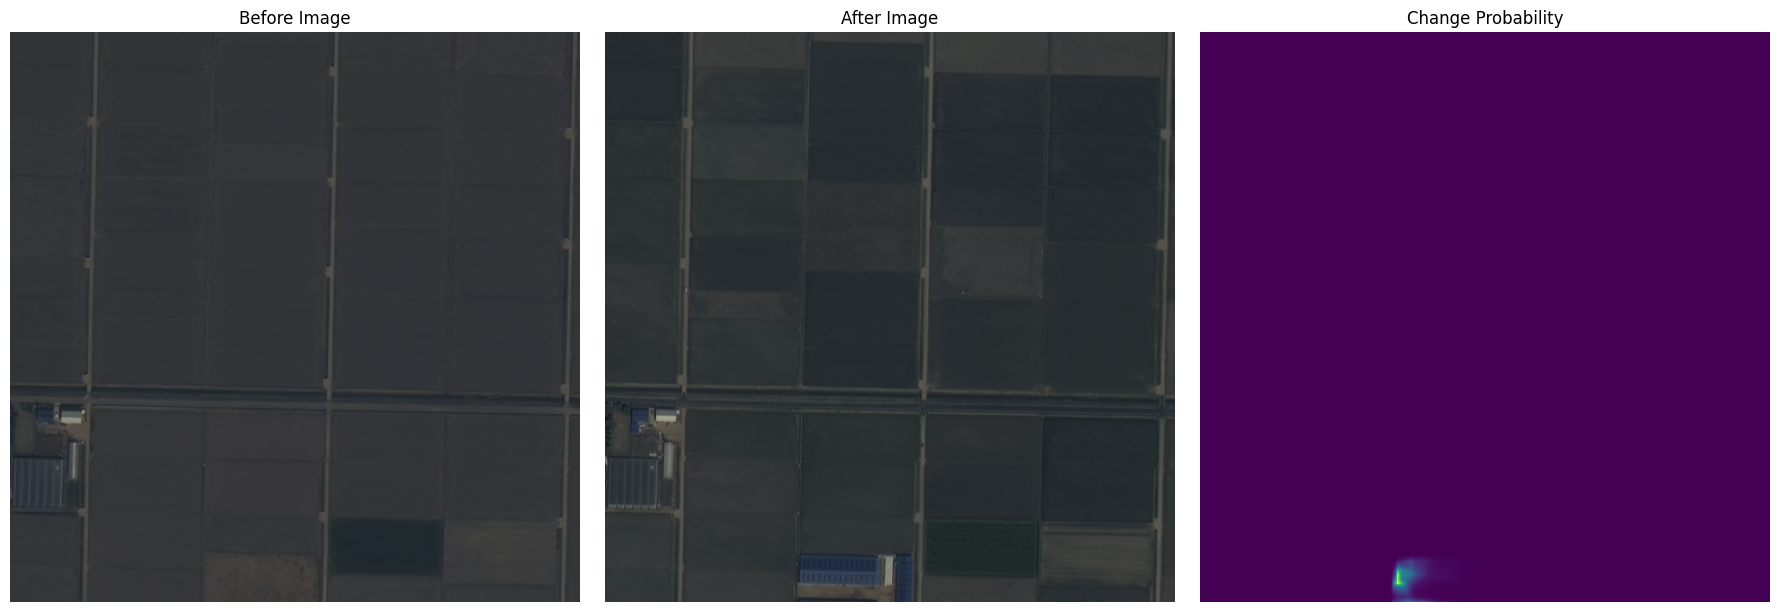

In [18]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms

# Load your own images
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Ensure image is in RGB format
    return image

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize to the input size expected by the model
    transforms.ToTensor(),           # Convert to tensor
])

# Replace these paths with the paths to your own images
before_image_path = 'C:/codes/Projects/HWAK/before.png'
after_image_path = 'C:/codes/Projects/HWAK/after.png'

# Load and preprocess images
t1_image = transform(load_image(before_image_path)).unsqueeze(0)  # Add batch dimension
t2_image = transform(load_image(after_image_path)).unsqueeze(0)   # Add batch dimension
bi_images = torch.cat([t1_image, t2_image], dim=1)  # [b, tc, h, w]

# Load the model
model = torch.hub.load('Z-Zheng/Changen', 'changestar_1x96', backbone_name='mitb1',
               pretrained=True, dataset_name='s2looking', force_reload=True)

# Ensure model and input are on the same device
device = 'cpu'
model = model.to(device)
bi_images = bi_images.to(device)

# Make predictions
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    predictions = model(bi_images)
    change_prob = predictions['change_prediction']  # [b, 1, h, w]

# Check the shape of the output
print(f"Output shape: {change_prob.shape}")

# Convert tensor to numpy array and squeeze the batch and channel dimensions
change_prob_np = change_prob.detach().cpu().numpy()

# Convert images from tensor to numpy array for visualization
t1_image_np = t1_image.squeeze().permute(1, 2, 0).cpu().numpy()  # [h, w, c]
t2_image_np = t2_image.squeeze().permute(1, 2, 0).cpu().numpy()  # [h, w, c]

# Plot the original images and change probability map
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Before image
axes[0].imshow(t1_image_np)
axes[0].set_title('Before Image')
axes[0].axis('off')

# After image
axes[1].imshow(t2_image_np)
axes[1].set_title('After Image')
axes[1].axis('off')

# Change probability
axes[2].imshow(change_prob_np[0, 0], cmap='viridis')  # Adjust colormap if needed
axes[2].set_title('Change Probability')
axes[2].axis('off')

plt.tight_layout()
plt.show()
